# 📈 Time Series Forecasting using ARIMA, SARIMA, and Prophet
This notebook includes:
- Data Preprocessing
- EDA (Exploratory Data Analysis)
- Forecasting with ARIMA, SARIMA, and Prophet

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## 🔄 Load and preprocess the data

In [14]:
# Load the dataset
df = pd.read_csv("stonks_data.csv")

# Convert date and set index
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)

# Quick look
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2023-01-02,97.49,117.42,97.59,99.88,735620
2023-01-03,109.01,114.28,85.06,108.21,979105
2023-01-04,104.64,116.03,88.70,98.65,420326
2023-01-05,101.97,106.79,96.11,106.78,923807
2023-01-06,93.12,116.30,89.74,110.14,461849


## 📊 EDA: Plot Closing Price

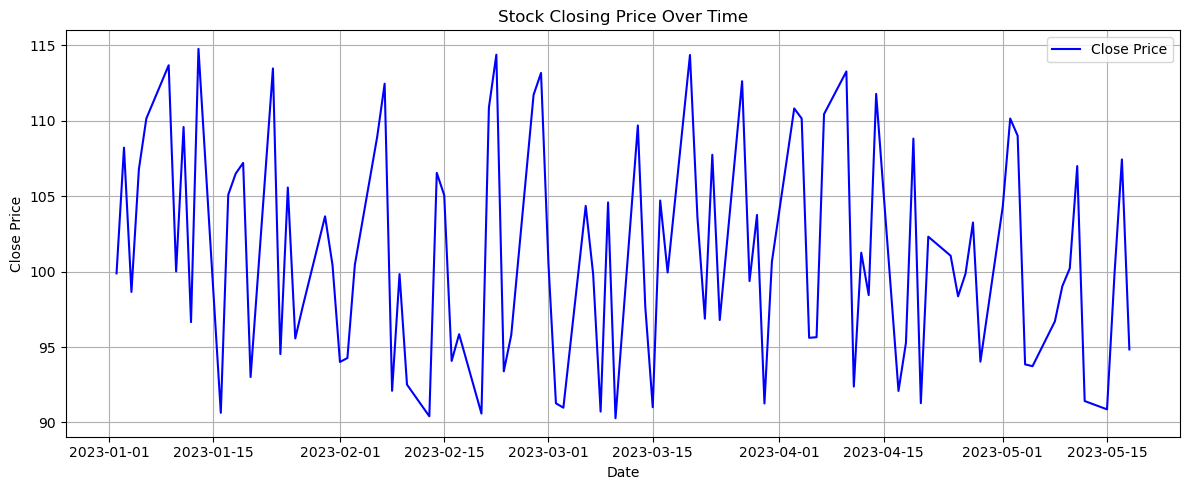

In [17]:
plt.figure(figsize=(12, 5))
plt.plot(df['Close'], label='Close Price', color='blue')
plt.title('Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 🔮 ARIMA Forecasting

C:\Users\ronit\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\ronit\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\ronit\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


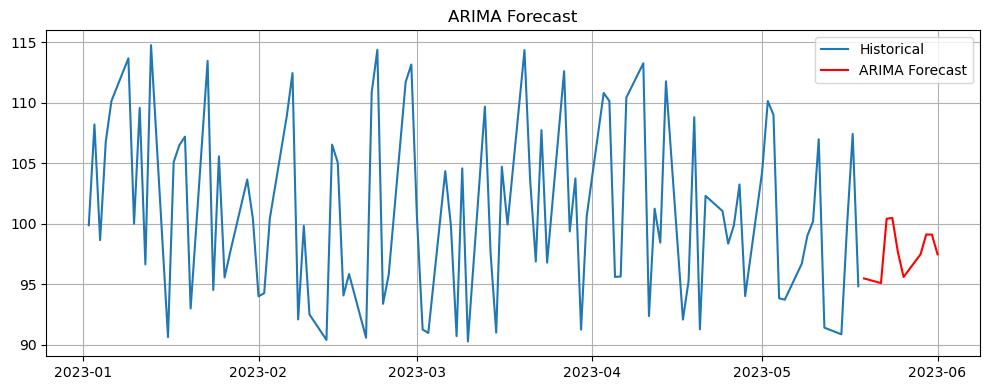

In [20]:
from statsmodels.tsa.arima.model import ARIMA

close_prices = df['Close']
arima_model = ARIMA(close_prices, order=(5, 1, 0))
arima_result = arima_model.fit()
arima_forecast = arima_result.forecast(steps=10)

plt.figure(figsize=(10, 4))
plt.plot(close_prices, label='Historical')
plt.plot(arima_forecast.index, arima_forecast, label='ARIMA Forecast', color='red')
plt.title('ARIMA Forecast')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 🔁 SARIMA Forecasting

C:\Users\ronit\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\ronit\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\ronit\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


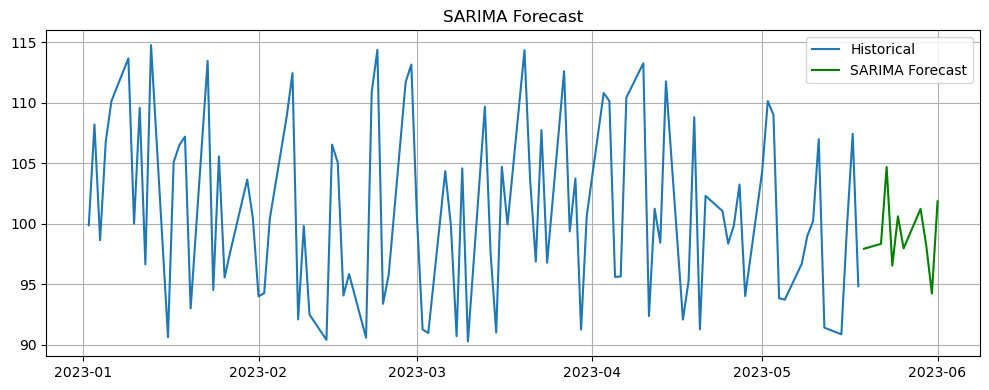

In [23]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_model = SARIMAX(close_prices, order=(1,1,1), seasonal_order=(1,1,1,12))
sarima_result = sarima_model.fit()
sarima_forecast = sarima_result.forecast(steps=10)

plt.figure(figsize=(10, 4))
plt.plot(close_prices, label='Historical')
plt.plot(sarima_forecast.index, sarima_forecast, label='SARIMA Forecast', color='green')
plt.title('SARIMA Forecast')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 📈 Prophet Forecasting

17:42:36 - cmdstanpy - INFO - Chain [1] start processing
17:42:37 - cmdstanpy - INFO - Chain [1] done processing


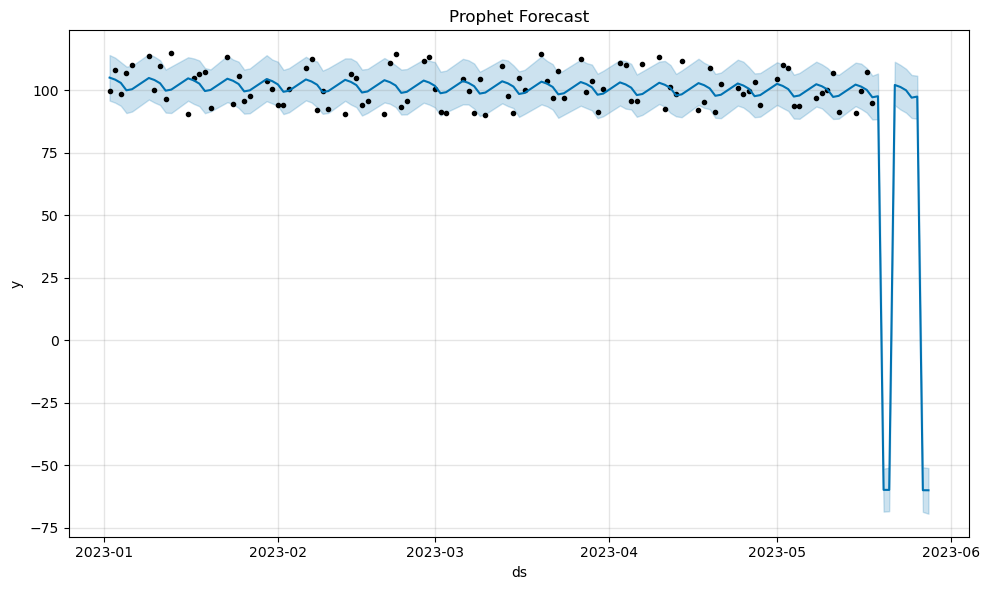

,ds,yhat
99,2023-05-19,97.611771
100,2023-05-20,-59.869452
101,2023-05-21,-59.890444
102,2023-05-22,102.109761
103,2023-05-23,101.302288
104,2023-05-24,100.001207
105,2023-05-25,97.039734
106,2023-05-26,97.464964
107,2023-05-27,-60.016260
108,2023-05-28,-60.037252


In [26]:
from prophet import Prophet

df_prophet = df['Close'].reset_index()
df_prophet.columns = ['ds', 'y']

prophet_model = Prophet()
prophet_model.fit(df_prophet)

future = prophet_model.make_future_dataframe(periods=10)
forecast = prophet_model.predict(future)

prophet_model.plot(forecast)
plt.title('Prophet Forecast')
plt.tight_layout()
plt.show()

# Print last 10 predicted values
forecast[['ds', 'yhat']].tail(10)

In [28]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Prepare the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['Close']])

# Create sequences
X, y = [], []
for i in range(60, len(scaled_data)):
    X.append(scaled_data[i-60:i])
    y.append(scaled_data[i])
X, y = np.array(X), np.array(y)

# Reshape for LSTM input
X = X.reshape((X.shape[0], X.shape[1], 1))

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Train the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=10, batch_size=32)


Epoch 1/10


C:\Users\ronit\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.3140
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1931
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1413
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0842
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0944
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0942
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0925
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0799
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0717
Epoch 10/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0895


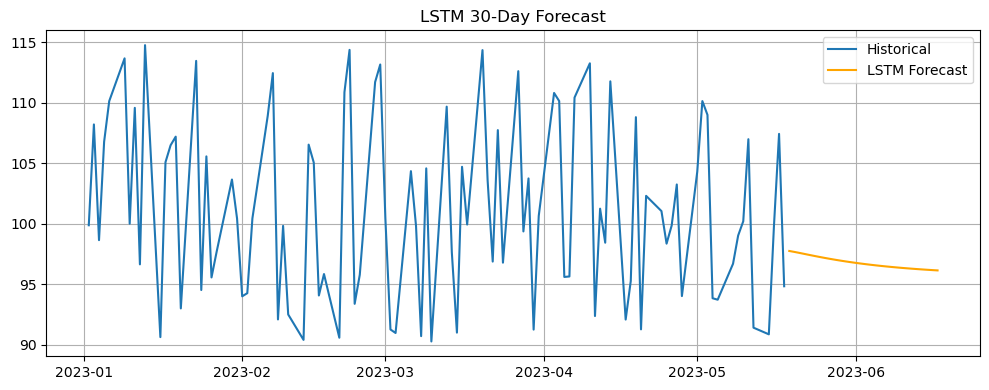

In [29]:
# Predict the next 30 days
last_60_days = scaled_data[-60:]
predictions = []

for _ in range(30):
    seq_input = last_60_days[-60:].reshape(1, 60, 1)
    pred = model.predict(seq_input, verbose=0)[0][0]
    predictions.append(pred)
    last_60_days = np.append(last_60_days, [[pred]], axis=0)

# Inverse scale predictions
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Create future date range
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30)

# Plot LSTM forecast
plt.figure(figsize=(10, 4))
plt.plot(df['Close'], label='Historical')
plt.plot(future_dates, predictions, label='LSTM Forecast', color='orange')
plt.title('LSTM 30-Day Forecast')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
